## Assessment of Reservoir Heterogeneity 

Below we assess reservoir heterogeneity based on static measures. Namely, we compute

i.) Coefficient of variation 

ii.) Dykstra-Parson's Coefficient

iii.) Lorenz Coefficient

In [126]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import math

In [216]:
Sandstone_cleaned = pd.read_csv('Data/DeclusteredSandstone.csv')
Shale_cleaned = pd.read_csv('Data/DeclusteredShale.csv')
Sandstone_raw = pd.read_csv('Data/DeclusteredRawSandstone.csv')
Shale_raw = pd.read_csv('Data/DeclusteredRawShale.csv')
Facies_raw = pd.concat([Sandstone_raw,Shale_raw]) # Includes all facies in the reservoir before outliers removed
Facies_cleaned = pd.concat([Sandstone_cleaned,Shale_cleaned]) # Includes all facies in the reservoir after outliers removed
#Facies_raw.to_csv('AllDataRaw.csv')
#Facies_cleaned.to_csv('AllDataCleaned.csv')

In [128]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return average, math.sqrt(variance)

## Coefficient of Variation w.r.t. Permeability

In [129]:
def comp_COV(dataframe,measure,weights):
    # Returns the Coefficient of Variation based on population mean and standard deviation
    weighted_mean, weighted_std = weighted_avg_and_std(dataframe[measure].values, weights)
    return weighted_std/weighted_mean

In [130]:
COV_Sandstone = comp_COV(Sandstone_cleaned,'Perm',weights=Sandstone_cleaned['Wts'].values)
COV_Shale = comp_COV(Shale_cleaned,'Perm',weights=Shale_cleaned['Wts'].values)
COV_SandstoneRaw = comp_COV(Sandstone_raw,'Perm',weights=Sandstone_raw['Wts'].values)
COV_ShaleRaw = comp_COV(Shale_raw,'Perm',weights=Shale_raw['Wts'].values)
COV_FaciesRaw = comp_COV(Facies_raw,'Perm',weights=Facies_raw['Wts'].values)
COV_FaciesCleaned = comp_COV(Facies_cleaned,'Perm',weights=Facies_cleaned['Wts'].values)

In [131]:
print('Cleaned Data')
print('Coefficient of Variation (Reservoir): ' + str(COV_FaciesCleaned))
print('Coefficient of Variation (Sandstone): ' + str(COV_Sandstone))
print('Coefficient of Variation (Shale): ' + str(COV_Shale))
print('')
print('Raw Data')
print('Coefficient of Variation (Reservoir-Raw): ' + str(COV_FaciesRaw))
print('Coefficient of Variation (Sandstone-Raw): ' + str(COV_SandstoneRaw))
print('Coefficient of Variation (Shale-Raw): ' + str(COV_ShaleRaw))

Cleaned Data
Coefficient of Variation (Reservoir): 2.0013441448324802
Coefficient of Variation (Sandstone): 1.6162400806067643
Coefficient of Variation (Shale): 1.4229212625543828

Raw Data
Coefficient of Variation (Reservoir-Raw): 6.436236856491556
Coefficient of Variation (Sandstone-Raw): 5.221453813250974
Coefficient of Variation (Shale-Raw): 3.3626832497000945


## Dykstra-Parson's Coefficient

In [198]:
def comp_DykstraParsons(dataframe,measure):
    P50 = np.percentile(dataframe[measure].values,50)
    P16 = np.percentile(dataframe[measure].values,16)
    return (P50-P16)/P50

In [199]:
print('Cleaned Data')
print('Dykstra-Parsons Coefficient (Reservoir): ' + str(comp_DykstraParsons(Facies_cleaned,'Perm')))
print('Dykstra-Parsons Coefficient (Sandstone): ' + str(comp_DykstraParsons(Sandstone_cleaned,'Perm')))
print('Dykstra-Parsons Coefficient (Shale): ' + str(comp_DykstraParsons(Shale_cleaned,'Perm')))
print('')
print('Raw Data')
print('Dykstra-Parsons Coefficient (Reservoir-Raw): ' + str(comp_DykstraParsons(Facies_raw,'Perm')))
print('Dykstra-Parsons Coefficient (Sandstone-Raw): ' + str(comp_DykstraParsons(Sandstone_raw,'Perm')))
print('Dykstra-Parsons Coefficient (Shale-Raw): ' + str(comp_DykstraParsons(Shale_raw,'Perm')))

Cleaned Data
Dykstra-Parsons Coefficient (Reservoir): 0.8826738515335498
Dykstra-Parsons Coefficient (Sandstone): 0.8752169349388415
Dykstra-Parsons Coefficient (Shale): 0.8053962101089088

Raw Data
Dykstra-Parsons Coefficient (Reservoir-Raw): 0.9123308170262382
Dykstra-Parsons Coefficient (Sandstone-Raw): 0.8714318837087329
Dykstra-Parsons Coefficient (Shale-Raw): 0.8670086754604851


## Univariate Analysis - Effect of Declustering

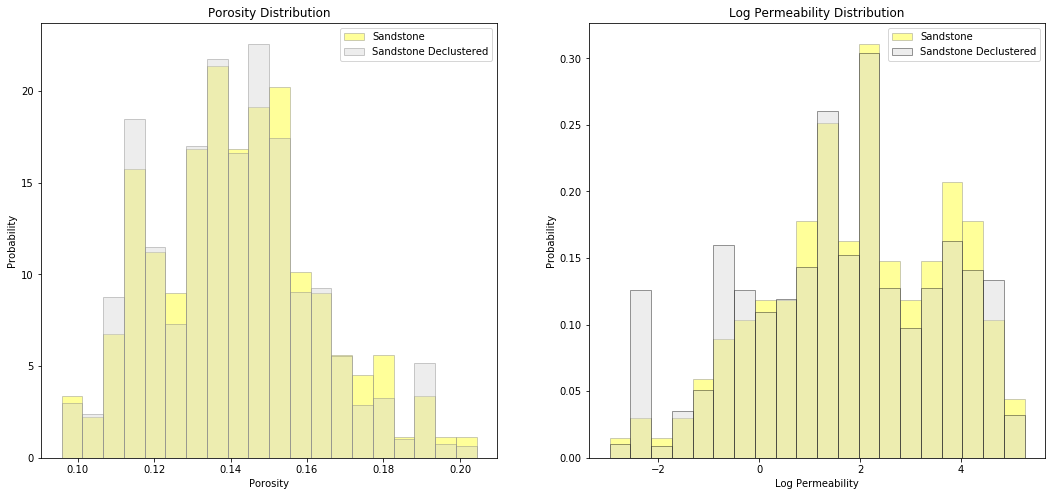

In [133]:
# univariate histograms
n_bins_sandstone = 20
n_bins_shale = 10

fig, ax2 = plt.subplots(1,2, figsize=(18,8))

# Porosity
ax2[0].hist(Sandstone_cleaned['Porosity'].values,  density=True, bins=n_bins_sandstone, edgecolor='gray', alpha=0.4, color='yellow', label='Sandstone')
ax2[0].hist(Sandstone_cleaned['Porosity'].values,  density=True, bins=n_bins_sandstone, weights=Sandstone_cleaned['Wts'], edgecolor='gray', alpha=0.4, color='lightgray', label='Sandstone Declustered')
ax2[0].set_title('Porosity Distribution')
ax2[0].set_ylabel('Probability')
ax2[0].set_xlabel('Porosity')
ax2[0].legend()

# Permeability
ax2[1].hist(np.log(Sandstone_cleaned['Perm'].values), density=True, bins=n_bins_sandstone, edgecolor='gray', alpha=0.4, color='yellow', label='Sandstone')
ax2[1].hist(np.log(Sandstone_cleaned['Perm'].values), density=True, bins=n_bins_sandstone,weights=Sandstone_cleaned['Wts'], edgecolor='black', alpha=0.4, color='lightgray', label='Sandstone Declustered')
ax2[1].set_title('Log Permeability Distribution')
ax2[1].set_ylabel('Probability')
ax2[1].set_xlabel('Log Permeability')
ax2[1].legend()

plt.show()

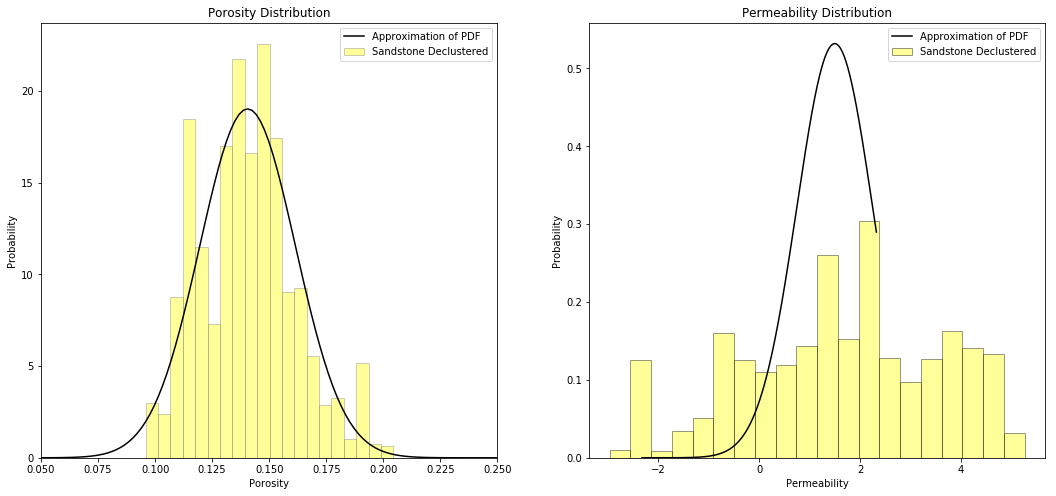

In [197]:
fig, ax2 = plt.subplots(1,2, figsize=(18,8))

# Porosity
mu_por,sigma_por = weighted_avg_and_std(Sandstone_cleaned['Porosity'].values, Sandstone_cleaned['Wts'].values)
x = np.linspace(sp.norm.ppf(0.01),sp.norm.ppf(0.99), 2500)
ax2[0].hist(Sandstone_cleaned['Porosity'].values,  density=True, bins=n_bins_sandstone, weights=Sandstone_cleaned['Wts'], edgecolor='gray', alpha=0.4, color='yellow', label='Sandstone Declustered')
ax2[0].plot(x,sp.norm.pdf(x, mu_por, sigma_por),color='k',label='Approximation of PDF')
ax2[0].set_xlim(0.05,0.25)
ax2[0].set_title('Porosity Distribution')
ax2[0].set_ylabel('Probability')
ax2[0].set_xlabel('Porosity')
ax2[0].legend()

# Permeability
mu_perm, sigma_perm = weighted_avg_and_std(Sandstone_cleaned['Perm'].values, Sandstone_cleaned['Wts'].values)
ax2[1].hist(np.log(Sandstone_cleaned['Perm'].values), density=True, bins=n_bins_sandstone,weights=Sandstone_cleaned['Wts'], edgecolor='black', alpha=0.4, color='yellow', label='Sandstone Declustered')
ax2[1].plot(x,sp.norm.pdf(x, 1.5, .75),color='k',label='Approximation of PDF')
ax2[1].set_title('Permeability Distribution')
ax2[1].set_ylabel('Probability')
ax2[1].set_xlabel('Permeability')
ax2[1].legend()

plt.show()

### Note: This section is not complete, I am struggling to fit a log-normal distribution to the permeability data